The objective of this assignment is to evaluate the understanding of regression techniques in supervised learning by applying them to a real-world dataset.

# Loading and Preprocessing

In [113]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [5]:
california = fetch_california_housing()

In [11]:
# Convert the dataset into a pandas DataFrame for easier handling.
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target  # Adding the target column (Median House Value)
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [13]:
# Find missing values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [17]:
# Rows and columns distribution
df.shape

(20640, 9)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [67]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Longitude', 'Target'],
      dtype='object')

In [27]:
# Find duplicates
df.duplicated().sum()

0

In [29]:
df.skew()

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
Target         0.977763
dtype: float64

* AveRooms, AveBedrms, and AveOccup indicate extreme right-skewness(Highly Positively Skewed), meaning a few properties have very high values compared to the majority.
* MedInc, Population, HouseAge are slightly right-skewed(moderately Positively Skewed), suggesting that most values are concentrated at lower values, but some high-income, older, or densely populated areas exist.
* Longitude (-0.30) has slight left-skewness suggests a concentration of longitude values in a particular range, with a few outliers towards lower values.
* Target is slightly right skewed meaning most houses are in the lower price range, with fewer expensive properties.

In [33]:
# Apply log transformation to highly skewed features
skewed= ['AveRooms', 'AveBedrms', 'AveOccup', 'Population', 'MedInc']  # Example selection
df[skewed] = df[skewed].apply(lambda x: np.log1p(x))  # log(1 + x) transformation
print(df.head())


     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.232720      41.0  2.077455   0.704982    5.777652  1.268511     37.88   
1  2.230165      21.0  1.979364   0.678988    7.784057  1.134572     37.86   
2  2.111110      52.0  2.228738   0.729212    6.208590  1.335596     37.85   
3  1.893579      52.0  1.919471   0.729025    6.326149  1.266369     37.85   
4  1.578195      52.0  1.985385   0.732888    6.338594  1.157342     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [35]:
df.skew()

MedInc        0.226083
HouseAge      0.060331
AveRooms      1.390761
AveBedrms     8.988786
Population   -1.044087
AveOccup      3.879679
Latitude      0.465953
Longitude    -0.297801
Target        0.977763
dtype: float64

In [49]:
skewed2= ['AveRooms', 'AveBedrms', 'AveOccup']  # Example selection
df[skewed2] = df[skewed2].apply(lambda x: np.log1p(x))  # log(1 + x) transformation
print(df.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.232720      41.0  1.124103   0.533554    5.777652  0.819124     37.88   
1  2.230165      21.0  1.091710   0.518191    7.784057  0.758266     37.86   
2  2.111110      52.0  1.172091   0.547666    6.208590  0.848267     37.85   
3  1.893579      52.0  1.071402   0.547558    6.326149  0.818179     37.85   
4  1.578195      52.0  1.093729   0.549789    6.338594  0.768877     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [51]:
df.skew()

MedInc        0.226083
HouseAge      0.060331
AveRooms      0.335100
AveBedrms     6.436582
Population   -1.044087
AveOccup      0.960154
Latitude      0.465953
Longitude    -0.297801
Target        0.977763
dtype: float64

In [53]:
skewed2= ['AveBedrms']  # Example selection
df[skewed2] = df[skewed2].apply(lambda x: np.log1p(x))  # log(1 + x) transformation
print(df.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.232720      41.0  1.124103   0.427588    5.777652  0.819124     37.88   
1  2.230165      21.0  1.091710   0.417520    7.784057  0.758266     37.86   
2  2.111110      52.0  1.172091   0.436748    6.208590  0.848267     37.85   
3  1.893579      52.0  1.071402   0.436678    6.326149  0.818179     37.85   
4  1.578195      52.0  1.093729   0.438119    6.338594  0.768877     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [55]:
df.skew()

MedInc        0.226083
HouseAge      0.060331
AveRooms      0.335100
AveBedrms     5.373251
Population   -1.044087
AveOccup      0.960154
Latitude      0.465953
Longitude    -0.297801
Target        0.977763
dtype: float64

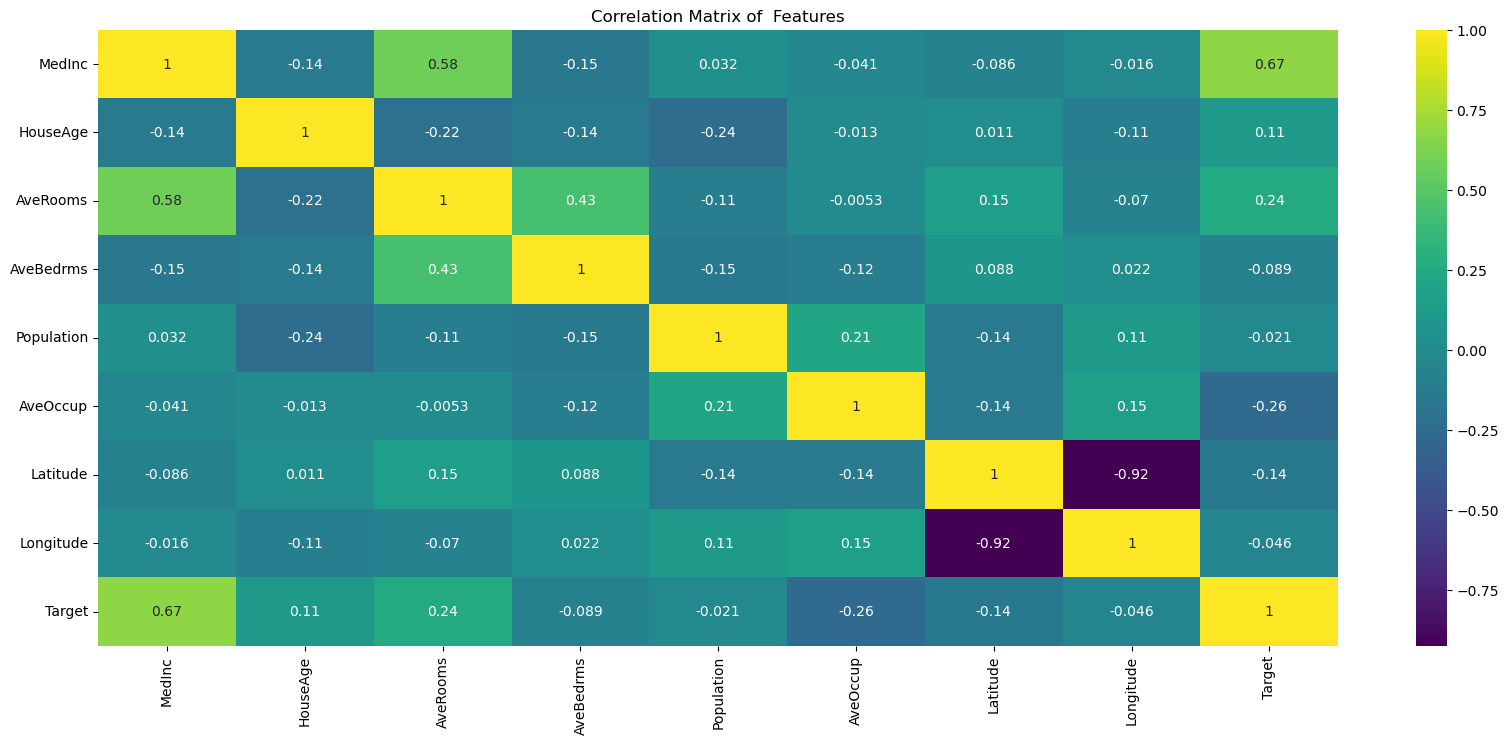

In [57]:
# Correlation heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of  Features')
plt.show()

Highly correlated column latitude is removed

In [61]:
df.drop(['Latitude'],axis=1,inplace=True)

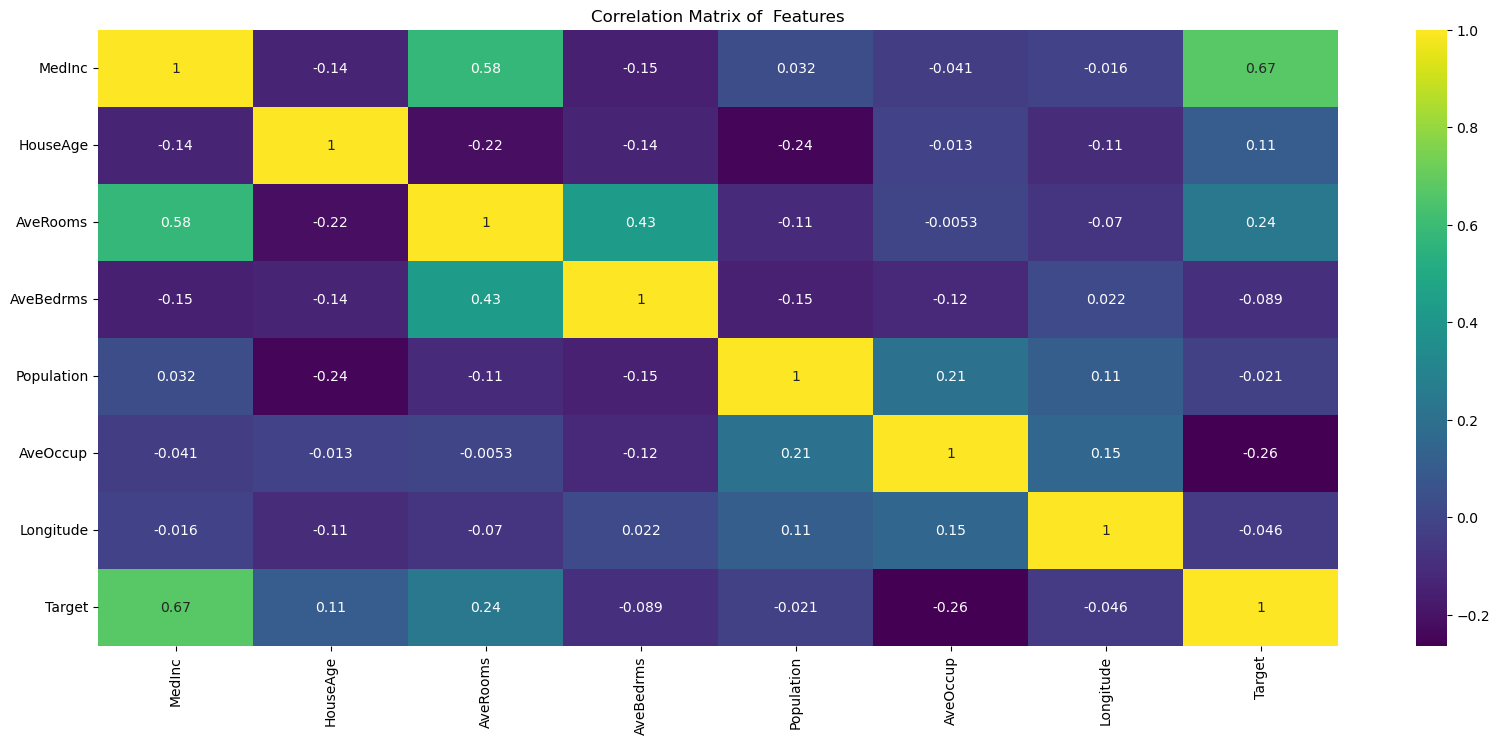

In [63]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of  Features')
plt.show()

In [69]:
#  define the features (x) and target (y)
X= df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']]
y=df['Target']

In [71]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Scaling using StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
y_train = pd.DataFrame(y_train)
scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)

In [117]:
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

In [83]:
x_train_scaled.shape

(16512, 7)

In [85]:
x_train.shape

(16512, 7)

In [87]:
y_train.shape

(16512, 1)

In [89]:
y_train_scaled.shape

(16512, 1)

# Model training using Linear regression

In [93]:
model = LinearRegression()

In [97]:
# Fit the model
model.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [99]:
# Predict
y_pred = model.predict(x_test)

In [101]:
print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

Slope (m): [ 0.89888167  0.19471035 -0.31185653  0.18950511  0.03493329 -0.20963613
 -0.01085023]
Intercept (b): [1.06163087e-15]


In [105]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 42.354685874874065
R^2 Score: -31.32173052700786


A higher MSE means larger errors (i.e.,model's predictions are far from actual values).
A negative R² means the model is worse than a simple mean-based prediction.

# Model training using Decision Tree Regressor

In [119]:
decision_tree_model = DecisionTreeRegressor()
# Fit the model
decision_tree_model.fit(x_train_scaled, y_train_scaled)
# Predict
y_pred_tree = decision_tree_model.predict(x_test_scaled)  # Make sure X_test is also scaled


In [129]:
mse = mean_squared_error(y_test, y_pred_tree)
r2 = r2_score(y_test, y_pred_tree)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 4.7561
R² Score: -2.6295


Lower MSE is better, so we need improvement. R² also needs improvement

# Model training using Random Forest Regressor

In [127]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(x_train_scaled, y_train)
y_pred_rf = rf_model.predict(x_test_scaled)

print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

Random Forest MSE: 0.48651251526865646
Random Forest R²: 0.6287323092659564


Random Forest Model significantly improved the performance compared to the Decision Tree and Linear Regression.